In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
#To display all columns
pd.pandas.set_option('display.max_columns',None)

In [6]:
df=pd.read_csv('kc_house_data.csv')

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.shape

(21613, 21)

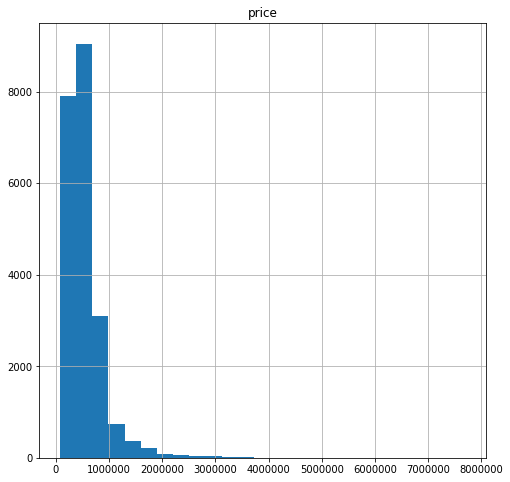

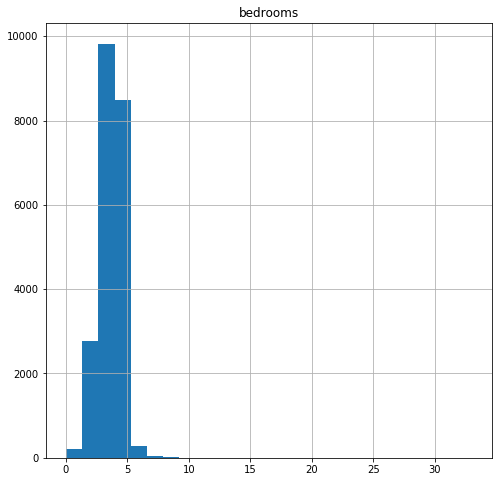

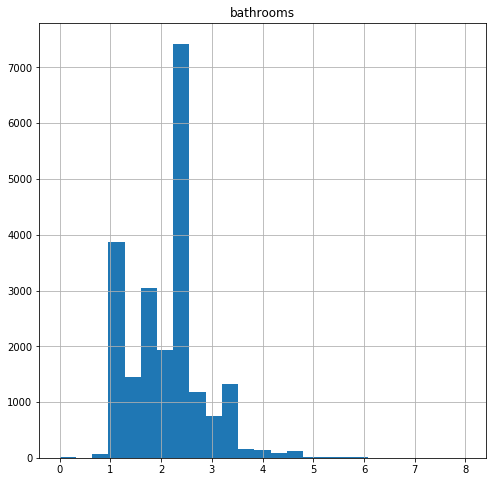

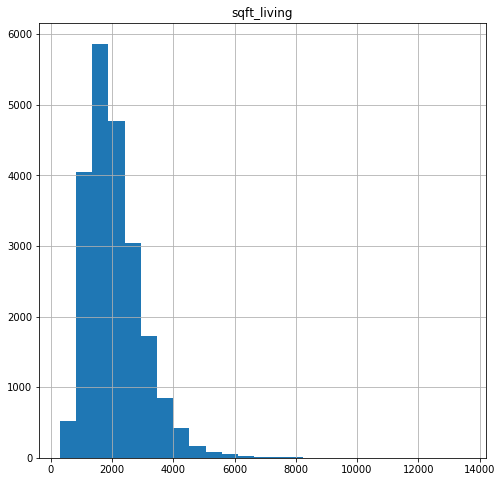

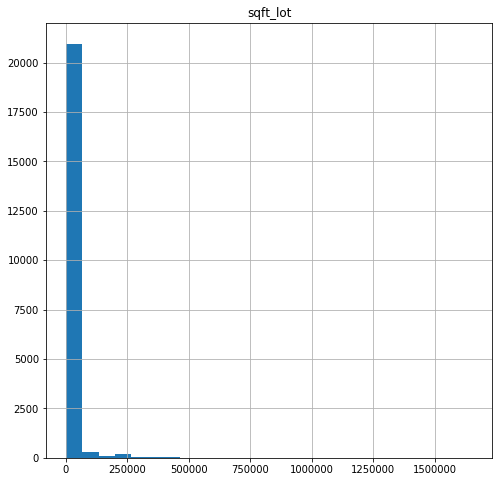

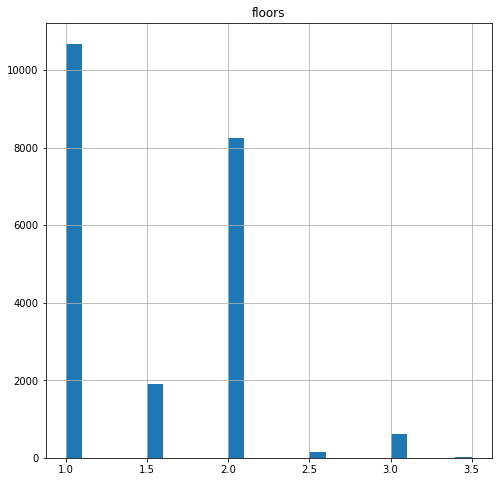

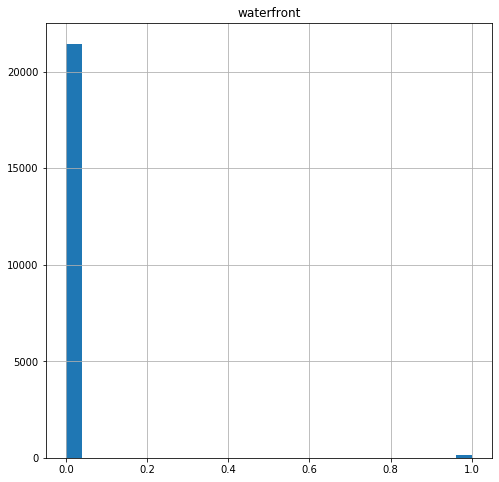

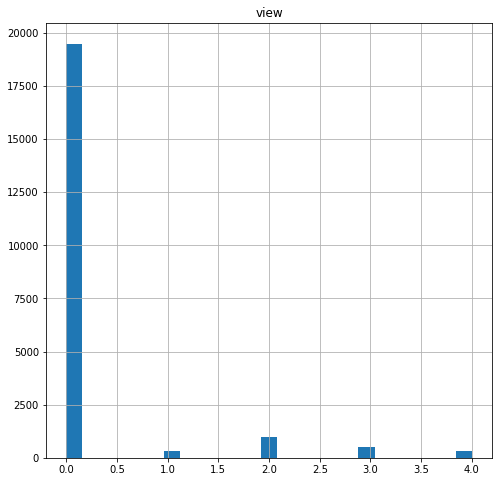

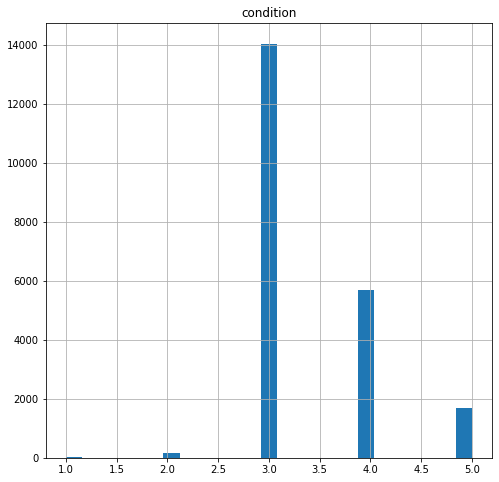

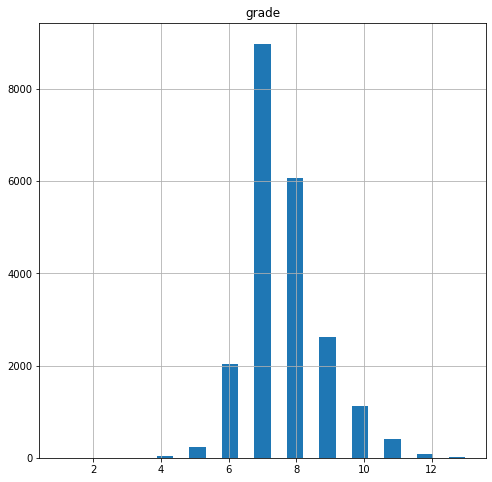

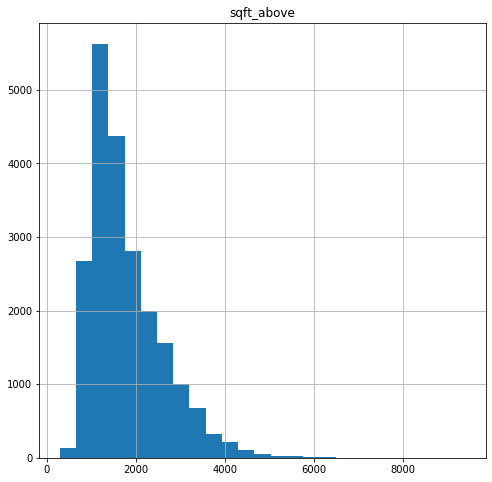

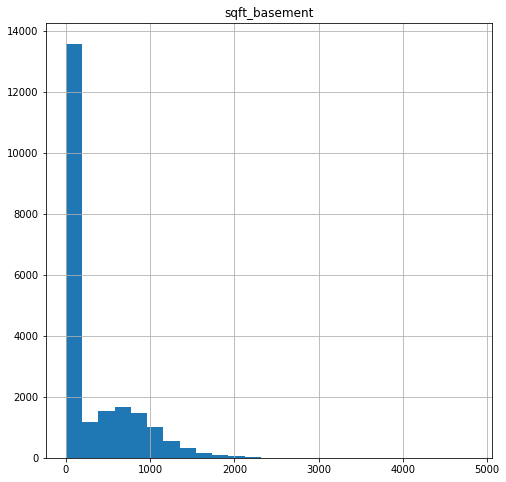

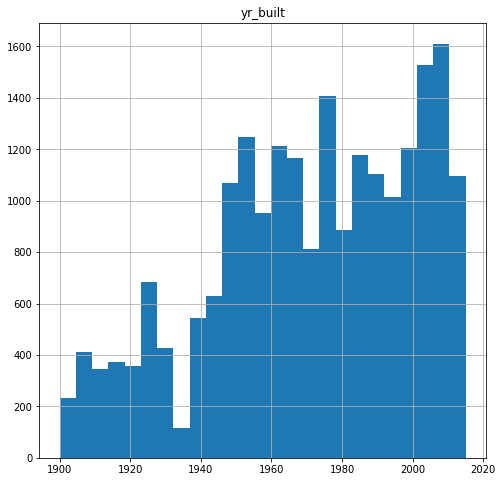

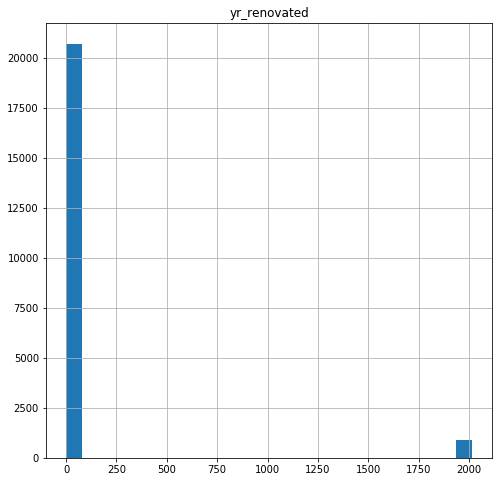

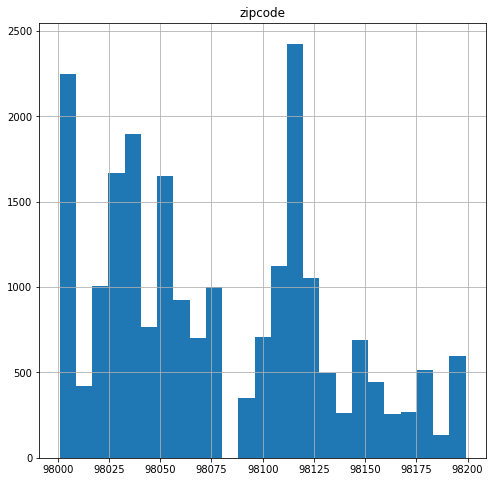

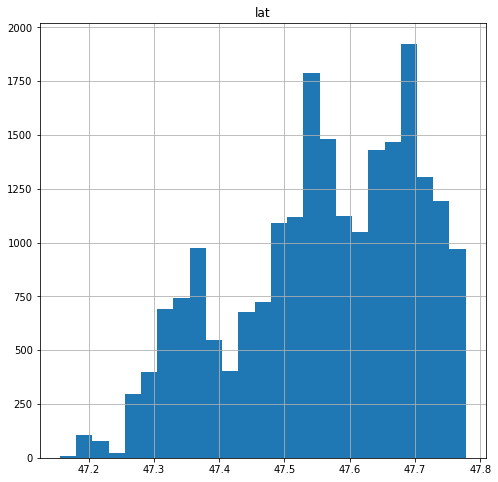

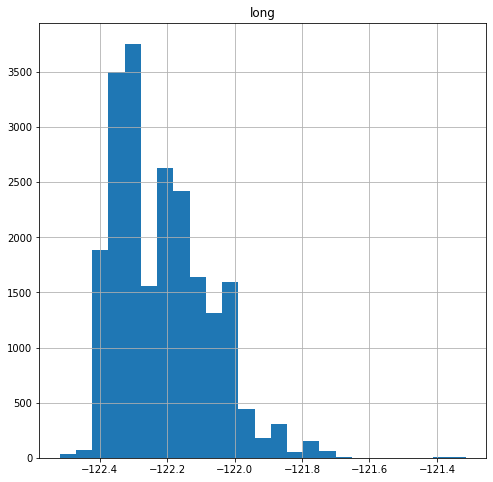

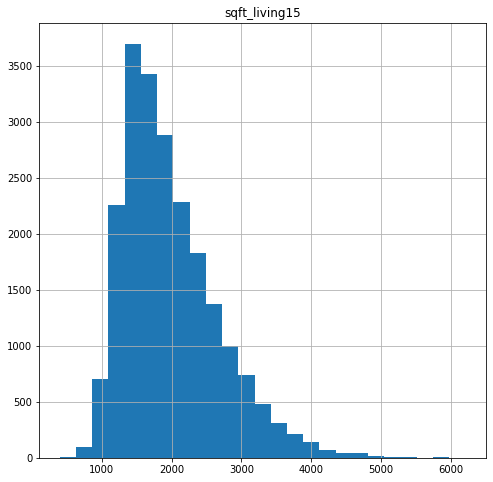

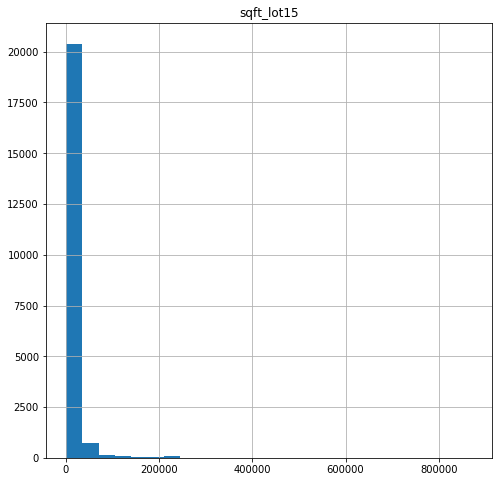

In [31]:
for feature in df.columns:
    if feature not in ['id','date',]:
        df[feature].hist(bins=25,figsize=(8,8))
        plt.title(feature)
        plt.show()

There are very few houses that have more than 6 bedrooms and prices greater than 4000000. All the outliers must be luxury houses.

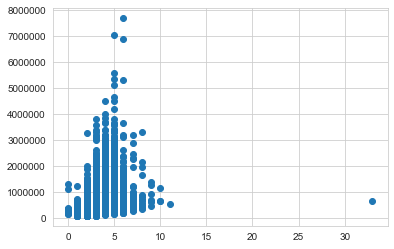

In [39]:
sns.set_style('whitegrid')
#sns.boxplot(x=df['bedrooms'],y=df['price'])
plt.scatter(df['bedrooms'],df['price'])

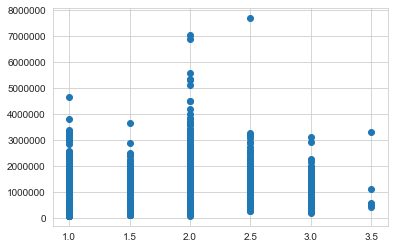

In [40]:
#sns.boxplot(x=df['floors'],y=df['price'])
plt.scatter(df['floors'],df['price'])

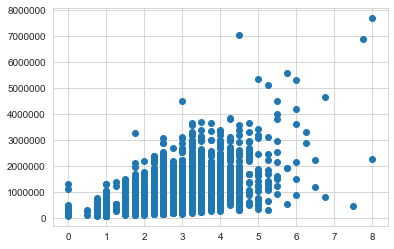

In [41]:
#sns.boxplot(x=df['bathrooms'],y=df['price'])
plt.scatter(df['bathrooms'],df['price'])

As we can clearly see that there is no linear relationship between price with the above features. Lets find relationship between other features for this we will use boxplot.

Text(0.5, 0, 'No of bedrooms')

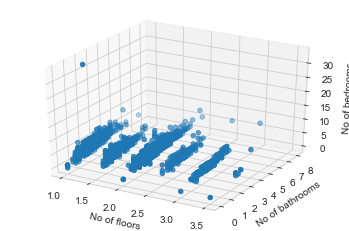

In [43]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['floors'],df['bathrooms'],df['bedrooms'])
ax.set_xlabel('No of floors')
ax.set_ylabel('No of bathrooms')
ax.set_zlabel('No of bedrooms')

[(0, 250000)]

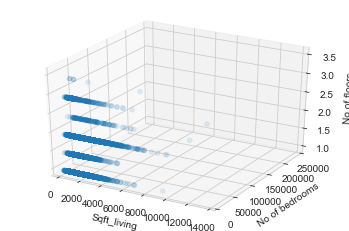

In [62]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['sqft_living'],df['bedrooms'],df['floors'],alpha=0.1)
ax.set_xlabel('Sqft_living')
ax.set_ylabel('No of bedrooms')
ax.set_zlabel('No of floors')
ax.set(ylim=[0,250000])

[(0, 250000)]

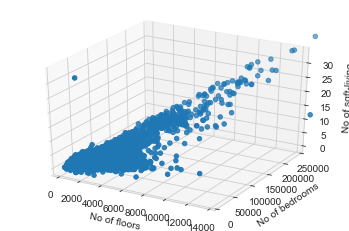

In [61]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1,projection='3d')
ax.scatter(df['sqft_living'],df['sqft_lot'],df['bedrooms'])
ax.set_xlabel('No of sqftliving')
ax.set_ylabel('No of sqlot')
ax.set_zlabel('No of bedrooms')
ax.set(ylim=[0,250000])

From above plots we can say that as sqft_living increases, sq_lot and bedrooms or bathrooms\bedrooms increases. Also as number of floors increases bedrooms/bathrooms also increase.

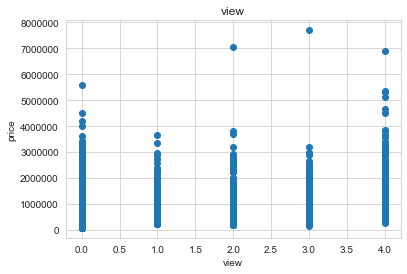

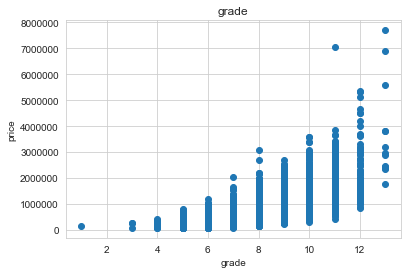

In [65]:
for feature in ['view','grade']:
    plt.scatter(df[feature],df['price'])
    plt.xlabel(feature)
    plt.ylabel('price')
    plt.title(feature)
    plt.show()

We can see that grade clearly has effect on price and view have no real effect on price.

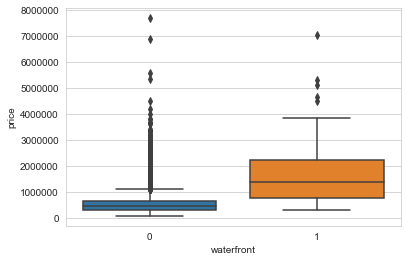

In [66]:
sns.boxplot(x=df['waterfront'],y=df['price'])

Waterfront also has some effect on price as the mean of prices that has waterfront is clearly higher

In [77]:
import folium
from folium.plugins import HeatMap
maxpr=df.loc[df['price'].idxmax()]

def baseMap(default=[47.5112,-122.257],zoom=10):
    base_map=folium.Map(location=default,control_scale=True,zoom_start=zoom)
    return base_map

data=df.copy()
data['count']=1
basemap=baseMap()
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
#Added marker for house with highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),icon=folium.Icon(color='green')).add_to(s)
#add heatmap
HeatMap(data=data[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)

basemap

Made heatmap for houses in king county, and house with max price is marked with a marker

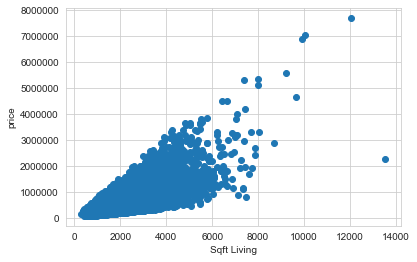

In [78]:
plt.scatter(df['sqft_living'],df['price'])
plt.xlabel('Sqft Living')
plt.ylabel('price')
plt.show()

It seems to have somewhat linear relationship with price. Lets check for correlation between features as high correlation between two features may hamper our models performance.

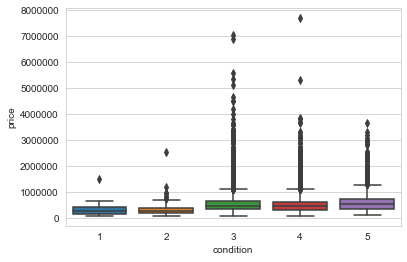

In [80]:
sns.boxplot(x=df['condition'],y=df['price'])

We can also clearly see here that higher the condition more the price. Lets add some new features.

In [106]:
df['YrSold']=[word[:4] for word in data['date']]
df.drop(columns=['YrOld','Renovyear'])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YrSold
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015


In [109]:
df['Age']=df['YrSold'].astype(int)-df['yr_built'].astype(int)

In [110]:
x=[]
for i in range(len(df['YrSold'])):
    if df['yr_renovated'][i]==0:
        x.append(0)
    else:
        x.append(int(df['YrSold'][i])-int(df['yr_renovated'][i]))
df['RenovAge']=x
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YrSold,YrOld,Renovyear,Age,RenovAge
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,2014,59,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23,63,23
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,2015,82,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,2014,49,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,2015,28,0


In [112]:
x=df['RenovAge'].mean()
df['RenovAge']=df['RenovAge'].replace(0,x)
df['RenovAge'].head()

0     0.779947
1    23.000000
2     0.779947
3     0.779947
4     0.779947
Name: RenovAge, dtype: float64

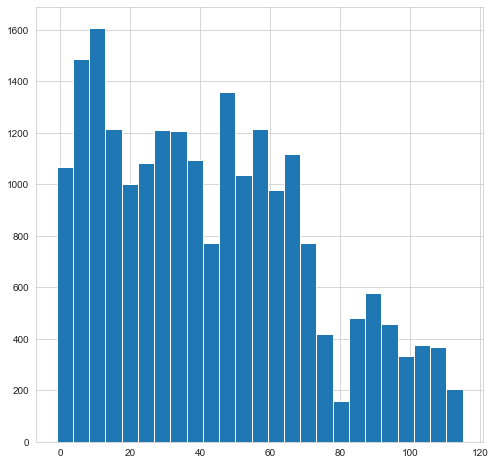

In [114]:
df['Age'].hist(bins=25,figsize=(8,8))


Making lat and long to some information. For that we use differences between distances from downtown areas as the prices near downtown areas would be high and prices near airport would be low that is guess. so lets find out

In [119]:
from haversine import haversine
Seattle_downtown=(47.605292350650245, -122.33487562365956)
Bellevue_Downtown=(47.61408784836942, -122.19960645887986)
KC_airport=(47.5367294130958, -122.30466322137374)
Seattle_airpott=(47.450435173275494, -122.30740980339972)
df['lat_long']=tuple(zip(df.lat,df.long))

In [127]:
dist_dtown=[]
dist_airport=[]
for i in df['lat_long']:
    dist_dtown.append(min(haversine(Seattle_downtown,(i),unit='mi'),haversine(Bellevue_Downtown,(i),unit='mi')))
    dist_airport.append(min(haversine(Seattle_airpott,(i),unit='mi'),haversine(KC_airport,(i),unit='mi')))
    
df['dist_dtown']=dist_dtown
df['dist_airport']=dist_airport
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,YrSold,YrOld,Renovyear,Age,RenovAge,lat_long,dist_dtown,dist_airport
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,59,2014,59,0.779947,"(47.5112, -122.257)",7.446479,2.838467
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,63,23,63,23.000000,"(47.721000000000004, -122.319)",8.028697,12.749375
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,82,2015,82,0.779947,"(47.7379, -122.23299999999999)",8.694524,14.294382
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49,2014,49,0.779947,"(47.5208, -122.39299999999999)",6.436173,4.265634
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,28,2015,28,0.779947,"(47.6168, -122.045)",7.203403,13.307529


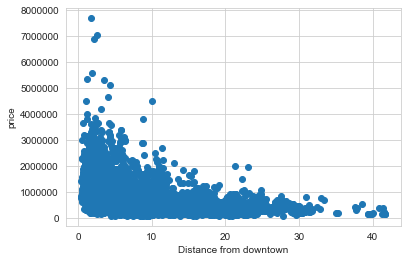

In [128]:
plt.scatter(df['dist_dtown'],df['price'])
plt.xlabel('Distance from downtown')
plt.ylabel('price')
plt.show()

We can see that as distance increases price decreases

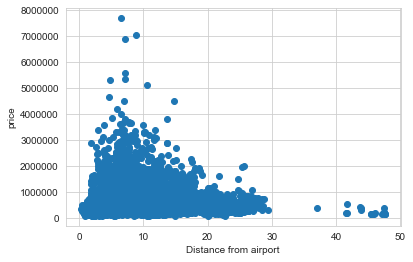

In [129]:
plt.scatter(df['dist_airport'],df['price'])
plt.xlabel('Distance from airport')
plt.ylabel('price')
plt.show()

If the distance from airport is less because of car traffic to the airport and it will be very noisy near airport.
We can also see that dist is greater prices are less
And prices are high if distance is in middle i.e. people can easily reach to airport

Lets see correlation between our features

In [134]:
nonimp_features=['date','id','zipcode','lat','long','yr_built','yr_renovated','YrSold','lat_long']
imp_feat=[feature for feature in df.columns if feature not in nonimp_features]
imp_feat

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'sqft_living15',
 'sqft_lot15',
 'Age',
 'RenovAge',
 'dist_dtown',
 'dist_airport']

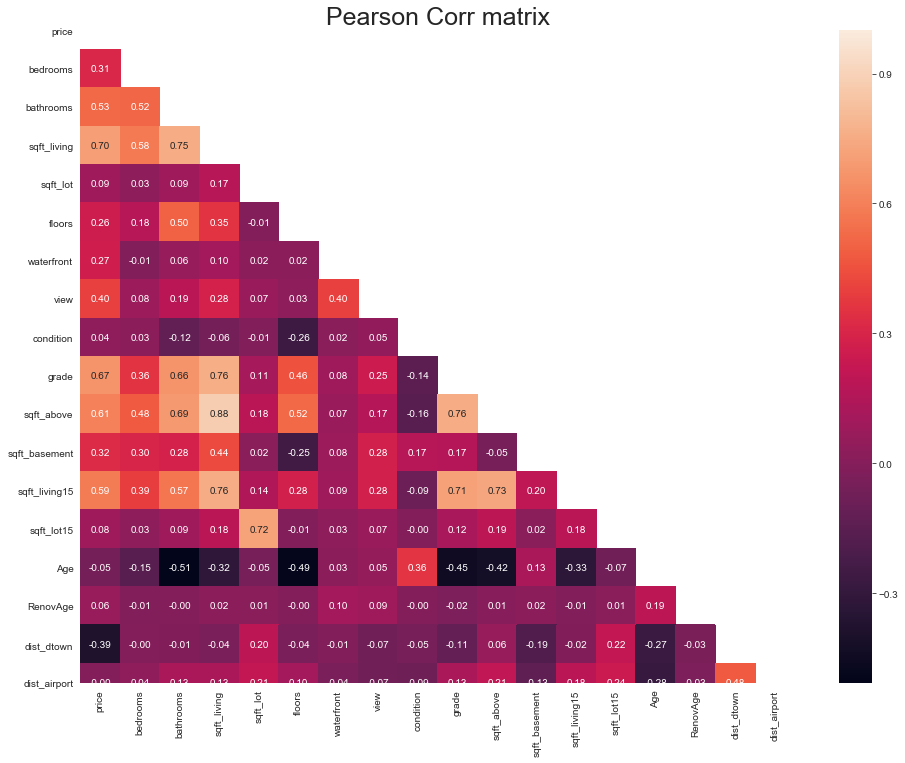

In [135]:
mask=np.zeros_like(df[imp_feat].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

f,ax=plt.subplots(figsize=(16,12))
plt.title('Pearson Corr matrix',fontsize=25)

sns.heatmap(df[imp_feat].corr(),annot=True,fmt='0.2f',mask=mask)

In [140]:
df_dummies=pd.get_dummies(df['zipcode'])
new_df=pd.concat([df[imp_feat],df_dummies],axis=1)
new_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,Age,RenovAge,dist_dtown,dist_airport,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98022,98023,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98052,98053,98055,98056,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0.779947,7.446479,2.838467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1690,7639,63,23.000000,8.028697,12.749375,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0.779947,8.694524,14.294382,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1360,5000,49,0.779947,6.436173,4.265634,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0.779947,7.203403,13.307529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Comparison of regression models

In [152]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score,GridSearchCV
from xgboost import XGBRegressor

In [146]:
train_data,test_data=train_test_split(new_df,train_size=0.7,random_state=2)
model_1=linear_model.LinearRegression()
model_1.fit(train_data.drop(columns=['price']),train_data['price'])

print('Intercept: {}'.format(model_1.intercept_))
print('Coeff: {}'.format(model_1.coef_))

pred=model_1.predict(test_data.drop(columns=['price']))

print('R2 score: {}'.format(metrics.r2_score(test_data['price'],pred)))
print('RMSE score: {}'.format(metrics.mean_squared_error(test_data['price'],pred)))
print('CrossVal score: {}'.format(cross_val_score(model_1,new_df.drop(columns=['price']),new_df['price'],cv=5).mean()))

Intercept: 279916980.63983077
Coeff: [-2.52170458e+04  2.55431350e+04 -1.02192932e+13  2.35807049e-01
 -4.26092898e+04  6.04025536e+05  5.86955572e+04  2.46180768e+04
  5.64315558e+04  1.02192932e+13  1.02192932e+13  7.92620942e+00
 -1.22784393e-01  8.21654813e+02 -1.33584082e+02 -1.10835234e+04
  3.96038494e+03 -2.80272111e+08 -2.80248756e+08 -2.80295442e+08
 -2.79725919e+08 -2.80171672e+08 -2.80173708e+08 -2.80224172e+08
 -2.80200782e+08 -2.80226673e+08 -2.80293745e+08 -2.80265828e+08
 -2.80290305e+08 -2.80231545e+08 -2.80311937e+08 -2.80224044e+08
 -2.80232268e+08 -2.80294325e+08 -2.80200371e+08 -2.80296542e+08
 -2.80312032e+08 -2.80305562e+08 -2.80094119e+08 -2.80225800e+08
 -2.80279623e+08 -2.79142142e+08 -2.79925676e+08 -2.80307267e+08
 -2.80206816e+08 -2.80215826e+08 -2.80225219e+08 -2.80317415e+08
 -2.80303862e+08 -2.80329681e+08 -2.80311623e+08 -2.80275638e+08
 -2.80356763e+08 -2.80264467e+08 -2.80256547e+08 -2.80255776e+08
 -2.80295942e+08 -2.80304263e+08 -2.79931870e+08 -2.8

### Regularization

In [151]:
model_2=linear_model.Ridge(alpha=0.1)
model_2.fit(train_data.drop(columns=['price']),train_data['price'])

print('Intercept: {}'.format(model_2.intercept_))
print('Coeff: {}'.format(model_2.coef_))

pred=model_2.predict(test_data.drop(columns=['price']))

print('R2 score: {}'.format(metrics.r2_score(test_data['price'],pred)))
print('RMSE score: {}'.format(metrics.mean_squared_error(test_data['price'],pred)))
print('CrossVal score: {}'.format(cross_val_score(model_2,new_df.drop(columns=['price']),new_df['price'],cv=5).mean()))

Intercept: -276717.46605629823
Coeff: [-2.52248963e+04  2.55325036e+04  1.12253403e+02  2.36740568e-01
 -4.25891065e+04  6.03353032e+05  5.87142579e+04  2.46264309e+04
  5.64524151e+04  9.36535906e+01  1.85803753e+01  7.93772907e+00
 -1.24644026e-01  8.22814265e+02 -1.32361607e+02 -1.14671074e+04
  4.27420618e+03 -7.38097923e+04 -5.05502246e+04 -9.71998340e+04
  4.65499100e+05  1.99420187e+04  1.91088461e+04 -3.24815880e+04
 -9.01807493e+03 -3.00454358e+04 -1.01480705e+05 -7.30459472e+04
 -9.79986464e+04 -3.36947528e+04 -1.13771137e+05 -3.08735136e+04
 -3.89263129e+04 -1.01814935e+05 -7.58835239e+03 -9.90038712e+04
 -1.14955386e+05 -1.07517205e+05  9.74876127e+04 -3.37363061e+04
 -8.34417623e+04  1.04696358e+06  2.67786365e+05 -1.10400014e+05
 -1.26618969e+04 -2.42154916e+04 -3.32718662e+04 -1.21398101e+05
 -1.09493815e+05 -1.33999791e+05 -1.17293470e+05 -8.22257091e+04
 -1.60107088e+05 -7.24314086e+04 -6.45586830e+04 -6.33524773e+04
 -1.03916699e+05 -1.06285314e+05  2.59821235e+05  8.

So for regularization score is the same with linear regression

**Polynomial Regression**

In [155]:
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(new_df)
X_trainpoly = polyfeat.fit_transform(train_data.drop(columns=['price']))
X_testpoly = polyfeat.fit_transform(test_data.drop(columns=['price']))
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])
pred1 = poly.predict(X_testpoly)
print('R2 score: {}'.format(metrics.r2_score(test_data['price'],pred1)))
print('RMSE score: {}'.format(metrics.mean_squared_error(test_data['price'],pred1)))

Degree: 3
R2 score: 0.8662876698733217
RMSE score: 18629764976.30876


**KNN Regression**

In [156]:
knn=KNeighborsRegressor()
parameters={'n_neighbors':[10,15,20]}
grid_knn=GridSearchCV(estimator=knn,param_grid=parameters,cv=3,n_jobs=-1)
grid_knn.fit(train_data.drop(columns=['price']),train_data['price'])

pred=grid_knn.predict(test_data.drop(columns=['price']))
print('R2 score: {}'.format(metrics.r2_score(test_data['price'],pred)))
print('RMSE score: {}'.format(metrics.mean_squared_error(test_data['price'],pred)))

R2 score: 0.4862356120815553
RMSE score: 71581355220.19508


**XGBOOST**

In [158]:
xg=XGBRegressor(objective='reg:linear')
xg.fit(train_data.drop(columns=['price']),train_data['price'])
pred=xg.predict(test_data.drop(columns=['price']))
print('R2 score: {}'.format(metrics.r2_score(test_data['price'],pred)))
print('RMSE score: {}'.format(metrics.mean_squared_error(test_data['price'],pred)))

[20:37:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.0.0/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.
R2 score: 0.8863480987433551
RMSE score: 15834801528.894308


Highest score is for xgboost regression. As xgboost boosts weak models and combine them to make a stronger model.